<a href="https://colab.research.google.com/github/joseluisll/AnalisisIbex/blob/main/AnalisisIbex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Instala plotly en Colab
!pip install plotly

import numpy as np
import pandas as pd
import plotly.graph_objects as go

#Preparar la serie HISTORICA de IBEX35 desde 1/1/2015 A 11/04/2025

In [48]:
# Abrir la serie de IBEX35
df_ibex = pd.read_csv('datos/datos_historicos_IBEX35.csv', parse_dates=['Fecha'], index_col='Fecha')

# Convert 'Último' column to float
df_ibex['Último'] = df_ibex['Último'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))

# Method 1: Min-Max Scaling (Normalization to [0, 1])
df_ibex['Normalizado'] = (df_ibex['Último'] - df_ibex['Último'].min()) / (df_ibex['Último'].max() - df_ibex['Último'].min())


#Preparar la serie HISTORICA de Petroleo_WTI desde 1/1/2015 A 11/04/2025

In [49]:
#datos históricos de petroleo_WTI y la normalizo
df_petroleo = pd.read_csv('datos/datos_historico_petroleo_wti.csv', parse_dates=['Fecha'], index_col='Fecha')

# Convert 'Último' column to float
df_petroleo['Último'] = df_petroleo['Último'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))

# Min-Max Scaling
df_petroleo['Normalizado'] = (df_petroleo['Último'] - df_petroleo['Último'].min()) / (df_petroleo['Último'].max() - df_petroleo['Último'].min())


#REPRESENTAR LAS SERIES TEMPORALES NORMALIZADAS SOBRE EL MISMO EJE

El grafico es interactivo y permite hacer zoom.

El OJO humano y el cerebro ya ha visto que hay relación entre ambas series.

In [56]:
# 1. Select 'Último' column from both DataFrames
ibex_ultimo = df_ibex['Normalizado']
petroleo_ultimo = df_petroleo['Normalizado']



# Crear DataFrame para Plotly
df_to_plot = pd.DataFrame({'IBEX35': ibex_ultimo, 'Petroleo_WTI': petroleo_ultimo})


## Assuming df_ibex and df_petroleo are already defined and loaded
min_len = min(len(df_ibex), len(df_petroleo))

# Create the date range
date_range = pd.date_range(start='2015-01-01', periods=min_len, freq='D')

# Truncate df_to_plot to the minimum length
df_to_plot = df_to_plot.iloc[:min_len]

# Assign the date range as the index to df_to_plot
df_to_plot.index = date_range

# Crear gráfico interactivo
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_to_plot.index, y=df_to_plot['IBEX35'],
                         mode='lines', name='IBEX35'))

fig.add_trace(go.Scatter(x=df_to_plot.index, y=df_to_plot['Petroleo_WTI'],
                         mode='lines', name='Petroleo_WTI'))

# Actualizar diseño del gráfico
fig.update_layout(title='IBEX35 vs Petroleo_WTI',
                  xaxis_title='Fecha',
                  yaxis_title='Valor',
                  hovermode='x unified',
                  template='plotly_white')

fig.show()


Yo concluiría que el índice de petroleo_WTI puede ser un indice adelantado del IBEX 35.

¿Cómo puedo calcular el tiempo de adelanto?
¿Habrá un factor de correlación?
¿Esto se podría hacer con un modelo?

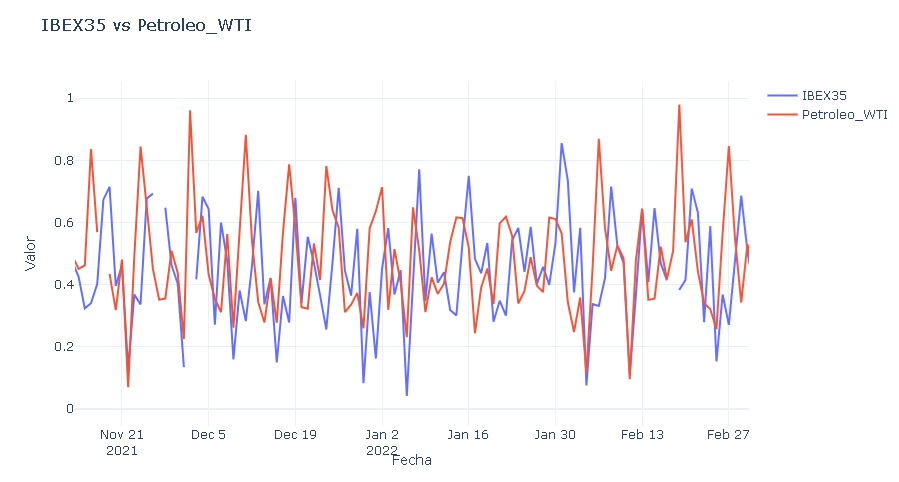